# Quickstart guide via Backtrader docs

[*********************100%***********************]  1 of 1 completed


Sharpe Ratios:
OrderedDict({'sharperatio': 0.5464881749122715})

Annual Returns:
OrderedDict({2010: 0.027886855312920567, 2011: 0.015163725365480385, 2012: 0.08479966265912342, 2013: 0.03264932922392361, 2014: 0.051640979243592566, 2015: -0.013774210614760363, 2016: -0.01783634725640204, 2017: 0.10179529313241709, 2018: 0.01235421834534245, 2019: 0.1131511008365309, 2020: 0.074657256043545, 2021: 0.0713374062709975, 2022: -0.016281487897707114, 2023: 0.02697139280826799, 2024: 0.012887977707809695, 2025: -0.03562587152947072})



<IPython.core.display.Javascript object>

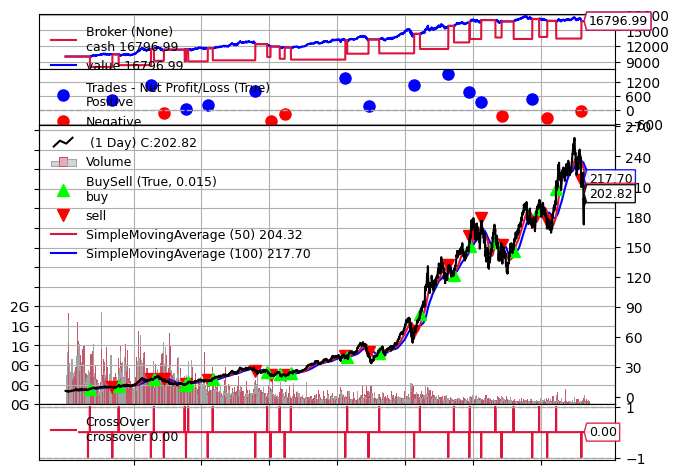

In [12]:
import backtrader as bt
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

cerebro = bt.Cerebro()

df = yf.download('AAPL', start='2010-01-01')

df.columns = df.columns.droplevel("Ticker")

feed = bt.feeds.PandasData(dataname=df)

cerebro.adddata(feed)


# defining the trading strategy
class SmaCross(bt.Strategy):
    # indicators / parameters
    def __init__(self):
        sma1 = bt.indicators.SimpleMovingAverage(self.data.close, period=50) # short moving average of 50 days
        sma2 = bt.indicators.SimpleMovingAverage(self.data.close, period=100) # long moving average of 100 days
        self.crossover = bt.indicators.CrossOver(sma1, sma2)  # crossover of fast and slow moving averages

    # trading logic
    def next(self):
        if not self.position: # if not in market
            if self.crossover > 0: # if fast crosses slow to the upside meaning the short # moving average is above the long moving average
                self.buy() # enter long

        elif self.crossover < 0: # if fast crosses slow to the downside meaning the short moving average is below the long moving average
                self.close() # close long position

cerebro.addstrategy(SmaCross)
cerebro.broker.setcash(10000)  # set initial cash 10,000
cerebro.broker.setcommission(commission=0.001)  # 0.1% commission per trade
cerebro.addsizer(bt.sizers.PercentSizer, percents=20)    # 20% of account

cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')  # add Sharpe Ratio analyzer
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')  # add Annual Return analyzer

teststrat = cerebro.run()

# Print the Sharpe Ratio and Annual Return
sharpe_ratio = teststrat[0].analyzers.sharpe_ratio.get_analysis()
annual_return = teststrat[0].analyzers.annual_return.get_analysis()
print(f"Sharpe Ratios:\n{sharpe_ratio}\n")
print(f"Annual Returns:\n{annual_return}\n")

# Plot the results
from IPython.display import display

figs = cerebro.plot()
for figlist in figs:
    for f in figlist:
        display(f)